# Objective: For each ID in the test set, you must predict 1 if the tweet is describing a real disaster, and 0 otherwise.

# 1. Basic Feature Extraction



Guide: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

## Prelude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                 # for visualisation
import seaborn as sns
import re                                                                       # for regular expression
import string                                                                   # for handling string
import math                                                                     # for math
from pandas_profiling import ProfileReport

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

from collections import defaultdict                                             # for EDA

# Packages for data preparation
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import keras
from keras import models
from keras import layers
from keras import regularizers
import tensorflow as tf

from sklearn.metrics import confusion_matrix                                    # for the modelling and plotting of curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# Packages for modeling
import keras
from keras import models
from keras import layers
from keras import regularizers
import tensorflow as tf
print (keras.__version__)

2.4.3


In [3]:
train_csv = 'C:/Users/zheng/Desktop/Data Science/Capstone Project/Data//train.csv'
test_csv = 'C:/Users/zheng/Desktop/Data Science/Capstone Project/Data//test.csv'

train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

pd.set_option("display.max_colwidth", None)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# 2. Basic Pre-processing

So far, we have learned how to extract basic features from text data. Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features. We will achieve this by doing some of the basic pre-processing steps on our training data.

So, let’s get into it.

### 2.1 Removal of http
We do not need the website/links for our text analysis, so we shall remove them.

In [5]:
def clean_text(text):
    text = re.sub(r'https://t.co\S+\s*', '', text)  # remove URLs http://t.co/lbwej0pxOd
    text = re.sub(r'http://t.co\S+\s*', '', text) 
    return text

In [6]:
train['clean'] = train['text'].apply(clean_text)
train['clean'].sample(20)

1278                                                                                                             Don't get burned twice by the same flame.
2264                  Businesses are|deluged with invoices. Make y urs stand out with colour or shape and it's likely to rise to the top of the pay' pile.
2883                                                                                                    'California's Burning:' Gov. on Drought Wildfires 
1138                                                                         The cryptic words that guided pilots on the Hiroshima bombing mission #canada
5957                                                                                             @noahshack he's hot &amp; he can sing I'm screaming??????
6255    LRT refer to the lyrics to hear Big Boi explain why heÛªs as cool as ÛÏsippinÛª a milkshake in a snowstorm' lame bars but effective at the time
1454                                                                  

### 2.2 Remove Mentions

The account name is irrevelant to what we want to analyse so we shall remove them.

In [7]:
def clean_text1(text):
    text = re.sub(r'@\S+', '', text)  # remove mentions
    return text

In [8]:
train['clean'] = train['clean'].apply(clean_text1)
train['clean'].sample(20)

7269                                                                                                             sounds like a whirlwind life!
5945    i dont even remember slsp happening i just remember being like wtf and then the lights turned off and everyone screamed for the encore
3925                                                                                     cue the flood of people 'ironically' calling you that
5611                                                                  The Latest: More Homes Razed by Northern California Wildfire - ABC News 
842                                                                                                   I call it a little bit of your blizzard?
958                                                   Louis Vuitton Monogram Sophie Limited Edition Clutch Cross body Bag - Full read by eBay 
4037                                                                                          USFS an acronym for United States Fire Service. 

### 2.3 Remove RT
We do not have to know who is tagged or being tagged so we shall remove them. We can't remove "cc" because of "accident"

In [9]:
def clean_text2(text):
    text = re.sub(r'RT|^cc', '', text) # remove RT
    return text

In [10]:
train['clean'] = train['clean'].apply(clean_text2)
train['clean'].sample(20)

849                                                                                                                                 Rip ?? Blood !
730                                                                                                                  head up like yo nose bleeding
1530            At FEMA's Center for Disaster Preparedness for a weeklong training on Chemical Biological Radioactive Nuclear   Emergency Response
7382      If you find your patio table umbrella and chairs flipped over and suspect foul play (instead of windstorm) you may be a suspense writer.
714                                                                                 you could slit my throat and I'd apologize for bleeding on you
2125        #vaxshill 2 deaths from measles complications in 10 yrs everyone looses their shit. 8 dead from Legionnaires in a month &amp; crickets
2456      Madhya Pradesh Train Derailment: Village Youth Saved Many Lives: A group of villagers saved over 70 passenge

### 2.4 Remove extra whitespace and special symbols

In [11]:
def clean_text3(text):
    text = re.sub(r'\s+$', '', text)
    text = re.sub(r'\^s+', '', text)
    text = re.sub(r'[^a-zA-Z\s]+', '', text) #remove special symbols
    return text

In [12]:
train['clean'] = train['clean'].apply(clean_text3)
train['clean'].sample(20)

4579                                                            A new type of ADHD Head injuries in children linked to longterm attention problems
4299          Allah describes piling up wealth thinking it would last forever as the description of the people of Hellfire in Surah Humaza Reflect
3838                                                            New Giant Flames GIANT FULL BLACK PANTOFEL infoorder sms pin pictwittercompNPiZoDY
4756                                                                                                Dont blink  wont see the Lightning take the W 
5218    I need an arcade shooter fix but CTE is empty amp only running obliteration Id even buy a CoD title if they werent all overpriced on steam
15                                                                                                                                    Whats up man
6663                                                                 The few I warned about  Were just as I expected T

### 2.5 Removing digits and words containing digits

Next, we need to remove numbers and words containing digits from the texts. I am doing this because digits and words containing digits do not give much importance to the main words. 

In [13]:
def clean_text4(text):
    text = re.sub(r'\w*\d\w*','', text)
    return text

In [14]:
train['clean'] = train['clean'].apply(clean_text4)
train['clean'].sample(20)

1733                                 dead in Russia bus accident At least  people were killed and  others injured when two buses collided i
2160                                             As of  there were  Beluga deaths reported at SeaWorld their average age   years OpSeaWorld
2193         ABC OnlineMH Aircraft debris found on La Reunion is from missing Malaysia Airlines ABC OnlineA piece of aircraft debris which 
1114                 true I faced everything from Is Bin Laden your uncle to Hopefully Afghanistan will be bombed Children can be very ugly
732                                                             I fell off someones back and hit my head on concrete  I was bleeding n shit
2402                                 Happy no one was hurt when wmata train derailed Also the express bus is so much better than metro rail
6840                              Hollywood Movie About Trapped Miners Released in Chile The  Hollywood movie about trapped miners starring
642                 

### 2.6 Expand contractions

Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the texts.

In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}



In [16]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train['clean'] = train['clean'].apply(lambda x:expand_contractions(x))
train['clean'].sample(20)

1043                                                                                            Lab today ready for these body bags 
120                   WisdomWed BONUS   Minute Daily Habits that could really improve your life How many do you already do lifehacks
6019                                                              SEISMIC RISK a COMPARISON between  case studies CALABRIA AND MALTA
7076                                                                       Ancient Mayan Tablet with Hieroglyphics Honors Lowly King
3849                                                                                   that new lil b x chance is nothing but flames
3765                            dont overwork yourself Your album is gonna be fire just dont overwork or stress I love you take care
7313                                                                                             These wild fires out west are crazy
6407                      killed in SArabia mosque suicide bombing\n\

Now that we have expanded the contractions, it’s time to lowercase the words.

### 2.7 Lower case
What we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [17]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['clean'].sample(20)

1138                                                     the cryptic words that guided pilots on the hiroshima bombing mission canada
5473                       bangalore reddit updates content policy promises to quarantine extremely offensive communities startups in
4580                                                                       right yep youre a witness to his injuries haha its a gauze
506                                     christian attacked by muslims at the temple mount after waving israeli flag via pamela geller
100                                           bahrain police had previously died in a road accident they were not killed by explosion
7215                                                                             iranian warship points weapon at american helicopter
2719    losdelsonido obama declares disaster for typhoondevastated saipan obama signs disaster declaration for northern ma ivanberroa
4225                                              dam gms olap

### 2.8 Removal of Stop Words
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('ur') #in case people typed ur instead of your
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['clean'].sample(20)

3192                   bodys like go fuck sleep sami minds like make emergency plan every natural disaster go
248                                world annihilation vs self transformation aliens attack exterminate humans
1708                                        reading work collided reading pleasure huzzah dont miss vermilion
7174                                        growingupblack walking past chicken frying like entering war zone
3671                                       wow fatality big rig hit motorcyclist blood everywhere wow im sick
7528                                    wreckage conclusively confirmed mh malaysia pm investigators families
6784                               rly tragedy mp live recount horror saw coaches train plunging water called
2179           love food fun malaysian prime minister najib razak confirmed aircraft debris found runion isla
6681                                                                            thunder buddys thunder buddys
6416      

### 2.9 Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [20]:
train['clean'] = train['clean'].str.replace('[^\w\s]','')
train['clean'].sample(20)

1467    catastrophe man opens school wanother hes athlete teacher principle fulfilling inside clerical duties
3820                                  thankful first responders especially life saving response today antioch
3704                                                                      didnt want hurt fear drove midnight
5991                                               hit tailor fucking made double play kay screams robbed hit
6376                                 pic yr old pkk suicide bomber detonated bomb turkey army trench released
1949                                                                           u bombed u try get home curfew
1342              heros fight wars save ppl burning buildings etc im sorry u gotta pay sex change call u hero
6702                                                                     thunder outside house afternoon gawx
142                                                                     man goes airplane engine accident via
5390      

As you can see in the above output, all the punctuation, including ‘#’, has been removed from the training data. We want to keep the content in case they are relevant e.g #fire

### 2.10 Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [21]:
freq = pd.Series(' '.join(train['clean']).split()).value_counts()[:10]
freq

like      345
im        306
amp       300
fire      252
get       229
new       226
via       220
dont      208
news      196
people    195
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data, except fire.

In [22]:
freq = list(freq.index)

In [23]:
print(freq)

['like', 'im', 'amp', 'fire', 'get', 'new', 'via', 'dont', 'news', 'people']


In [24]:
freq.remove('fire')

In [25]:
print(freq)

['like', 'im', 'amp', 'get', 'new', 'via', 'dont', 'news', 'people']


In [26]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['clean'].sample(20)

7060                      series finale thegame survived much upheaval audience got much good story
17                                                                                    summer lovely
6382                           yr old pkk suicide bomber detonated bomb turkey army trench released
2921                                                                          wtf mom drowned child
7480                     ranking artectura pop n florence machine ship wreck music playlist youtube
3818                                                 roadid thanks alex story first responders need
6780                                                                                 forget tragedy
7286                          highly recommend titania whirlwind reimagining shakespeares midsummer
1184                                          two giant cranes holding bridge collapse nearby homes
5997                                                    casually phone jasmine cries screams spider


### 2.11 Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [27]:
s = pd.Series(' '.join(train['clean']).split()).value_counts()

In [28]:
freq1 = s[s == 1].index
freq1

Index(['spoke', 'sang', 'cdnpoli', 'trp', 'taxis', 'visiting', 'camper',
       'kasabwe', 'brasswork', 'coolweird',
       ...
       'playingnow', 'harman', 'comprehensive', 'rv', 'misled', 'farmr',
       'jesuss', 'gut', 'delusions', 'reserved'],
      dtype='object', length=8402)

In [29]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
train['clean'].sample(20)

3379         updated rockyfire map mandatory evacuation areas red advisory evacuation yellow centers green
167                                                        risk getting killed cop dying airplane accident
1836                            already phone updated somehow phone crashed restore theyre letting restore
7048                                                               gpm satellite bullseye typhoon soudelor
3727                                     couples less sex fear itll let internet movies books saying sex p
7606                             suicide bomber kills saudi security site mosque reuters world google wall
6884                                                                                 hes still traumatised
6581                                                 anniversary atomic bomb survivors speak nuclear power
7371                                                               nowplaying school seven bells windstorm
5937                                 

All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

### 2.12 Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

In [30]:
%%time

from textblob import TextBlob
train['clean'].apply(lambda x: str(TextBlob(x).correct()))

train['clean'].sample(20)

Wall time: 30min 8s


5381                                               say concern panic many games left games left
535                                                                    cant come deal avalanche
3687                      kosciusko police investigating pedestrian fatality hit train thursday
2048                             girl wanna save danger health try somebody wanna somebody else
5210    rare occasion go complete obliterated next day throwing passing body accustomed alcohol
6514                                                                                    survive
3434                    toronto going crazy blue jays imagine good city might literally explode
6725             nws posts severe thunderstorm warnings parts ar nc ok seek strong shelter risk
4182                                         choking hazard prompts recall kraft cheese singles
1521                                        syndrome name catastrophic space debris destruction
6692                                    

### 2.13 Tokenisation and  Lemmatisation

Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [31]:
# Init the Wordnet Lemmatizer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_verb_text(text):
    return [lemmatizer.lemmatize(w, 'v') for w in w_tokenizer.tokenize(text)]

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zheng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
train['clean'] = train['clean'].apply(lemmatize_verb_text)
train['clean'].sample(20)

3857                                                                                 [watch, go, flame]
739                                                    [let, see, good, soccer, youre, bleed, yo, face]
6429                                                                      [hes, lessons, suicide, bomb]
3161                                        [blonde, teen, security, guard, set, view, download, video]
4152                                                  [inner, man, route, harm, spend, replace, online]
2622                                                                [republican, economic, destruction]
5364                                                       [heres, part, panic, want, make, better, ok]
1232                          [fire, hazard, associate, installation, noncompliant, external, cladding]
4604                                                                            [california, explosion]
7249    [idea, mean, look, violent, crime, rate, without, weapon

In [34]:
train['clean'] = train['clean'].apply(lambda x: " ".join([str(word) for word in x]))

In [35]:
train['clean'].sample(20)

422                                                   anything nice say come sit
427                                                             take arsonist mc
7137                                usgs km volcano hawaii time utc epicenter sm
7606    suicide bomber kill saudi security site mosque reuters world google wall
2489           daniel time daily shall take away abomination maketh desolate set
4719                              may get little exit home make lava lamp source
5549                                 go beach jim mean guarantee rainstorm lucky
5360                                 drake rep night shots musik wasnt panic fun
3001          keep either someone place southern dust storm house someone talkin
3998                    dead due flood myanmar aug death toll rise today myanmar
2690                                       look upon three electrical detonation
2064                                 remember time goku give life dead hell goku
1944                        

### 2.14 Final Product

In [36]:
train[['text','clean']].sample(20)

,text,clean
7504,I'm an emotional wreck watching emmerdale,emotional wreck watch emmerdale
6674,#PlayingNow #BLOODBOUND Seven Angels Media Stream http://t.co/dlY6rUuSqK,seven angels media stream
2843,PennLive - Two families displaced by Mechanicsburg blaze - No one was injured in the fire. http://t.co/OHYD7Hhcpe,two families displace blaze one injure fire
7261,Only been back 10 &amp; a whirlwind has hit jaiden started open his present straight away didn't even get chance get in &amp; sit down lol,back whirlwind hit start open present straight away didnt even chance sit lol
1592,That sounds like a really bad idea I like Yoenis but I feel like his production could fall off a huge cliff.,sound really bad idea feel could fall huge cliff
7372,Windstorm board OKs rate hike before change http://t.co/AI6kwOrBbT #politics #txlege #twia,windstorm board oks rate hike change politics twia
3051,Contruction upgrading ferries to earthquake standards in Vashon Mukilteo: The upgrades will bring the vulnera... http://t.co/Au5jWGT0ar,contruction upgrade ferry earthquake standards vashon mukilteo bring
1915,@keampurley thirst has no curfew,thirst curfew
2946,I got drowned like 5 times in the damn game today ????????????,get drown time damn game today
4696,So cool @GarbanzoBean23 in the news! Cutest INDOT worker but I might be a little bias ?? http://t.co/g7K9TqVQbk,cool worker might little


### 2.15 Word Cloud

# 3. Modelling

In [37]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, annot_kws={"size": 16}, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    label_font = {'size':'15'} 
    title_font = {'size':'21'}
    
    ax[0].set_title('Confusion Matrix', fontdict=title_font)
    ax[0].set_xlabel('True label', fontdict=label_font)
    ax[0].set_ylabel('Predicted label', fontdict=label_font)
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall', fontdict=label_font)
    ax[1].set_ylabel('Precision', fontdict=label_font)
    ax[1].set_title('2-class Precision-Recall curve', fontdict=title_font)

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate', fontdict=label_font)
    ax[2].set_ylabel('True Positive Rate', fontdict=label_font)
    ax[2].set_title('Receiver Operating Characteristic', fontdict=title_font)
    ax[2].legend(loc = 'lower right',  prop={'size': 15})

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

# 3.2 Set Feature Labels

In [38]:
# Features and Labels
X = train['clean']
y = train['target']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 6090
# Test data samples: 1523


# 4. Feature Engineering

Then we set some parameters that will be used throughout the notebook. The batch size is the number of samples processed before the model is updated. The number of epochs is the number of complete passes (iteration) through the training dataset.

In [39]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary to create word vector
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [40]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

In [41]:
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))

Fitted tokenizer on 6090 documents
10000 words in dictionary


In [42]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)
print('"{}" is converted into {}'.format(X_train[1], X_train_seq[1]))

"forest fire near la canada" is converted into [1333, 2394, 4538, 955, 585, 777, 378]


One hot encoding is very explained in this link. Essentially, it is a binary indicator of whether a feature (word etc) exists in the training documents or not. It is used in this instance as instead of showing the positional index of a particular word, it indicates 1/0 if the word is present in the document.

In [43]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

In [44]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[1], X_train_oh[1]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[1].sum()))

"[1333, 2394, 4538, 955, 585, 777, 378]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [45]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
print('"{}" is converted into {}'.format(y_train[1], y_train_le[1]))
print('"{}" is converted into {}'.format(y_train_le[1], y_train_oh[1]))

"1" is converted into 0
"0" is converted into [1. 0.]


In [46]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.2, random_state=42)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (1218, 10000)


## 4.1 Set-up of Dense Feedforward Classifier
The model used is a sequential model with 2 intermediate hidden layers. In the input layer, there are 64 neurons (what is described as a perceptron). As there are 10000 words, total no of parameters in the first layer = 64*10000 + 64 (for constants) = 640064.

In the 2nd layer, this takes the output from the 1st layer (64 outputs from the 64 neurons) Total no of parameters = 64*64 + 64 = 4160.

There are 2 outputs (shape) from the last output layer which correspond to probabilities of the 2 classes - real and fake. Total no of parameters = 64* 2 +2 = 130

The Dense FNN is the simplest model that should be understood first in DL.

In [47]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(2, activation='softmax'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


Next, the model is compiled. The loss function is meant for categorical classifications. 
$-(y log(p) + (1-y) log(1-p))$ So suppose for a positive label, and the classifier classes the positive/ negative classes as (0.8,0.2), $p=0.8, y=1$ for the cross entropy calculated as $0.223$. If it classifies as 100% positive, the cross entropy is 0.

In [48]:
def deep_model(model):
    model.compile(optimizer='adam'
                  , loss='binary_crossentropy'
                  , metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

base_history = deep_model(base_model)

Note the below, where with the no of epochs (iterations), the train loss decreases. However, the validation losses increases. This is a symptom of over-fitting. Too often, this occurs for deep learning. The same thing occurs for the accuracy, which increases for the training set but remain stagnant for the validation set.

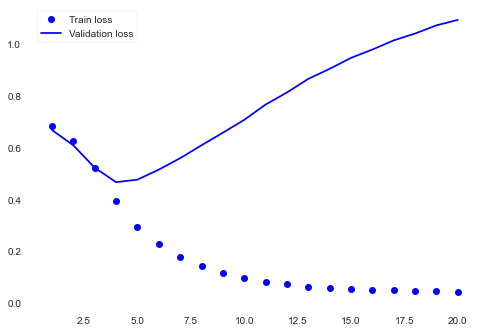

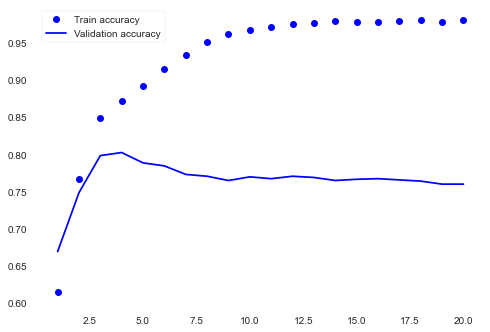

In [49]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()
    
eval_metric(base_history, 'loss')
eval_metric(base_history, 'accuracy')

In the next example, what we do is to remove one hidden layer and also decrease the no of neurons from 64 to 32. This will hopefully reduce over-fitting

## 4.2 Less over-fitting with reduced model
Indeed as we observe, the baseline model sees increasing losses while the reduced model (with fewer neurons and one hidden layer less) loss does not increase even with increasing epochs.

In [50]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(2, activation='softmax'))
reduced_model.summary()

reduced_history = deep_model(reduced_model)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 320,098
Trainable params: 320,098
Non-trainable params: 0
_________________________________________________________________


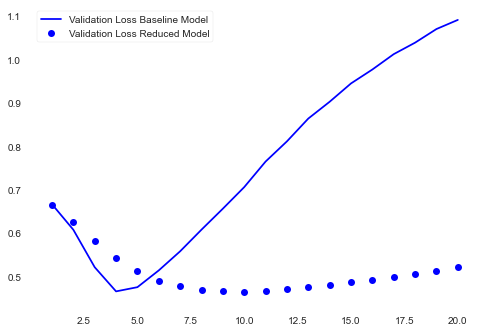

In [51]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'b', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'bo', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()
    
compare_loss_with_baseline(reduced_history, 'Reduced Model')

## 4.3 Reduce over-fitting with regularizer
Another method to reduce over-fitting is adding a penalty through a regularizer, which relays the weights in each layer to the final loss function. Again as seen below, the regularised model sees a consistent loss relative to the baseline model.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


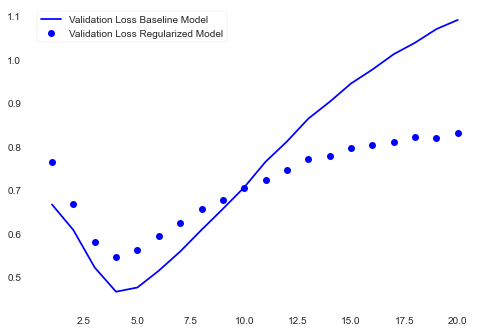

In [52]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(2, activation='softmax'))
reg_model.summary()
    
reg_history = deep_model(reg_model)
compare_loss_with_baseline(reg_history, 'Regularized Model')

## 4.4 Reducing over-fitting by dropping
A third way to reduce over-fitting is by randomly dropping data-sets for training. In this case, an additional hidden layer is used to drop some of the intermediate training data. As observed below, the validation losses remain consistent.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


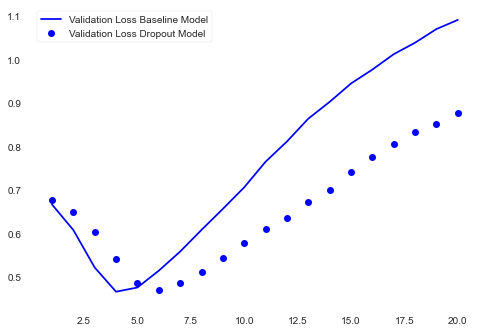

In [53]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(2, activation='softmax'))
drop_model.summary()

drop_history = deep_model(drop_model)

compare_loss_with_baseline(drop_history, 'Dropout Model')

# 5.Testing model results
We use out models for in-sample testing of the data. In fact the 3 models (regularised, drop-out and reduced models) all work well in spite of controlling for over-fitting as seen by a higher accuracy.

In [54]:
def test_model(model, epoch_stop):
    
    model.compile(optimizer='adam'
                  , loss='binary_crossentropy'
                  , metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    
    loss, accuracy, precision, recall, roc_auc = model.evaluate(X_test_oh, y_test_oh)
    
    return loss, accuracy, precision, recall, roc_auc

base_results = test_model(base_model, 3)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

48/48 [==============================] - 0s 2ms/step - loss: 0.7553 - accuracy: 0.7689 - precision_4: 0.7689 - recall_4: 0.7689 - auc_4: 0.8367
/n
Test accuracy of baseline model: 76.89%


In [55]:
reduced_results = test_model(reduced_model, 8)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

reg_results = test_model(reg_model, 3)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

drop_results = test_model(drop_model, 5)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

48/48 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7879 - precision_5: 0.7879 - recall_5: 0.7879 - auc_5: 0.8551
/n
Test accuracy of reduced model: 78.79%
48/48 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.7781 - precision_6: 0.7781 - recall_6: 0.7781 - auc_6: 0.8502
/n
Test accuracy of regularized model: 77.81%
48/48 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.7846 - precision_7: 0.7846 - recall_7: 0.7846 - auc_7: 0.8491
/n
Test accuracy of dropout model: 78.46%


https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

# 6. Results

https://deeplizard.com/learn/video/2f-NjDUvZIE

https://deeplizard.com/learn/video/km7pxKy4UHU

# A reminder that now 0 means real news, 1 is fake thanks to OHE from line [45]

## 6.1 Baseline Model

In [56]:
y_pred_base = base_model.predict(X_valid)
y_round_pred_base = np.argmax(y_pred_base, axis=1)

In [57]:
y_pred_base

array([[0.8114673 , 0.18853271],
       [0.13614865, 0.8638513 ],
       [0.9629417 , 0.03705832],
       ...,
       [0.9829654 , 0.01703465],
       [0.01675793, 0.98324203],
       [0.9962597 , 0.00374034]], dtype=float32)

In [58]:
y_round_pred_base

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
y_valid

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Accuracy : 0.8941 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9146 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8380 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8882                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


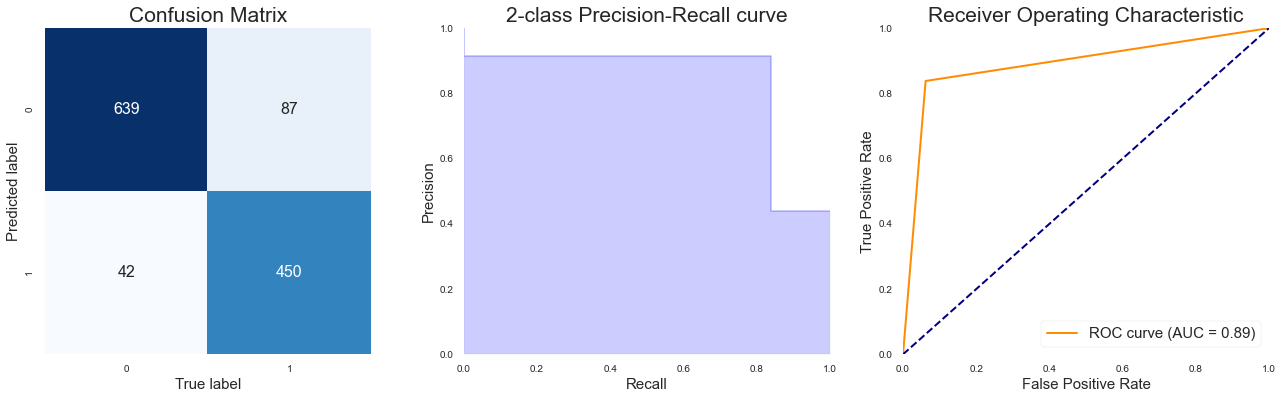

(0.8940886699507389,
 0.9146341463414634,
 0.8379888268156425,
 0.8881574090025348)

In [60]:
show_summary_report(y_valid[:,1], y_round_pred_base)

## 6.2 Reduced Model

In [61]:
y_pred_reduced = reduced_model.predict(X_valid)
y_round_pred_reduced = np.argmax(y_pred_reduced, axis=1)

Accuracy : 0.8941 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9232 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8287 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8872                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


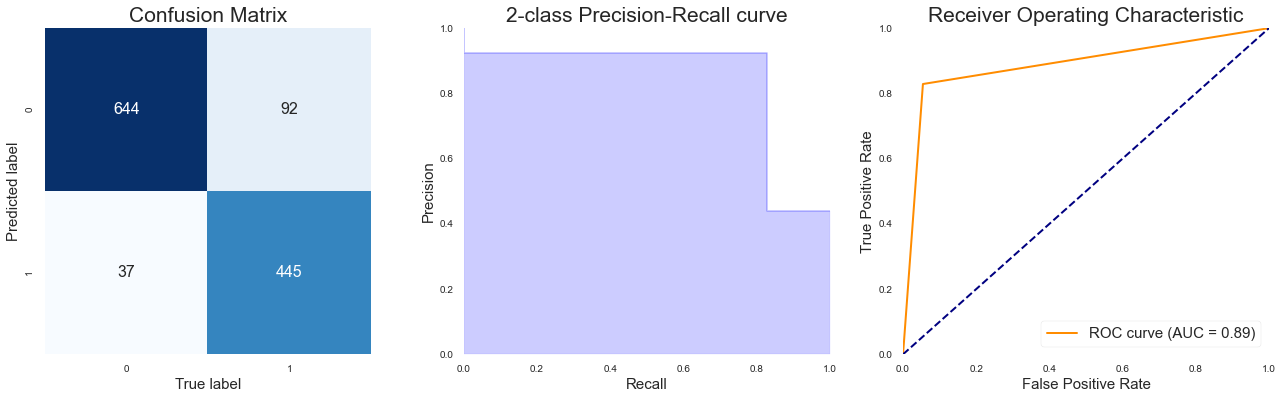

(0.8940886699507389, 0.9232365145228216, 0.8286778398510242, 0.887172987473236)

In [62]:
show_summary_report(y_valid[:,1], y_round_pred_reduced)

## 6.3 Regularised Model

In [63]:
y_pred_reg = reg_model.predict(X_valid)
y_round_pred_reg = np.argmax(y_pred_reg, axis=1)

Accuracy : 0.9269 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9462 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8845 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9224                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


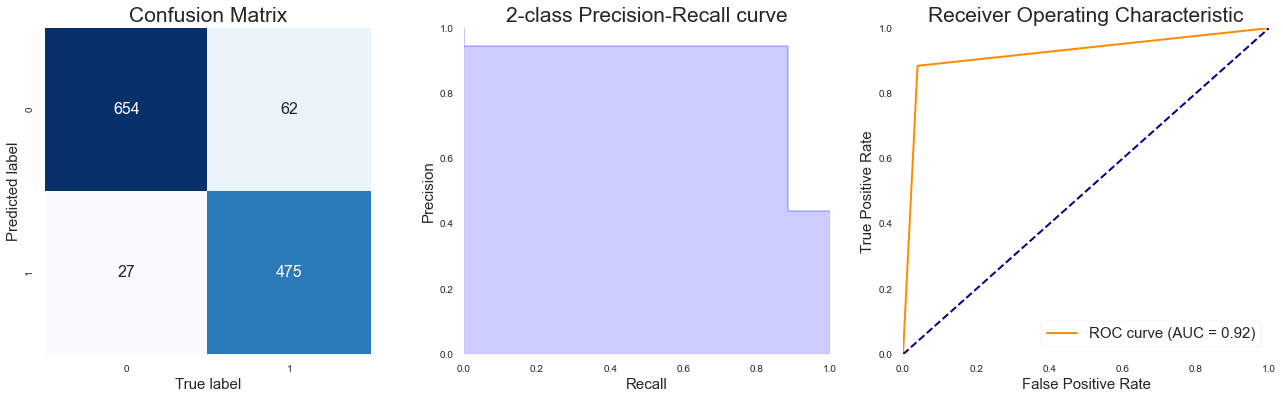

(0.9269293924466339,
 0.9462151394422311,
 0.8845437616387337,
 0.9224480922731114)

In [64]:
show_summary_report(y_valid[:,1], y_round_pred_reg)

## 6.4 Dropout Model

In [65]:
y_pred_drop = drop_model.predict(X_valid)
y_round_pred_drop = np.argmax(y_pred_drop, axis=1)

Accuracy : 0.8949 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9269 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8268 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8877                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


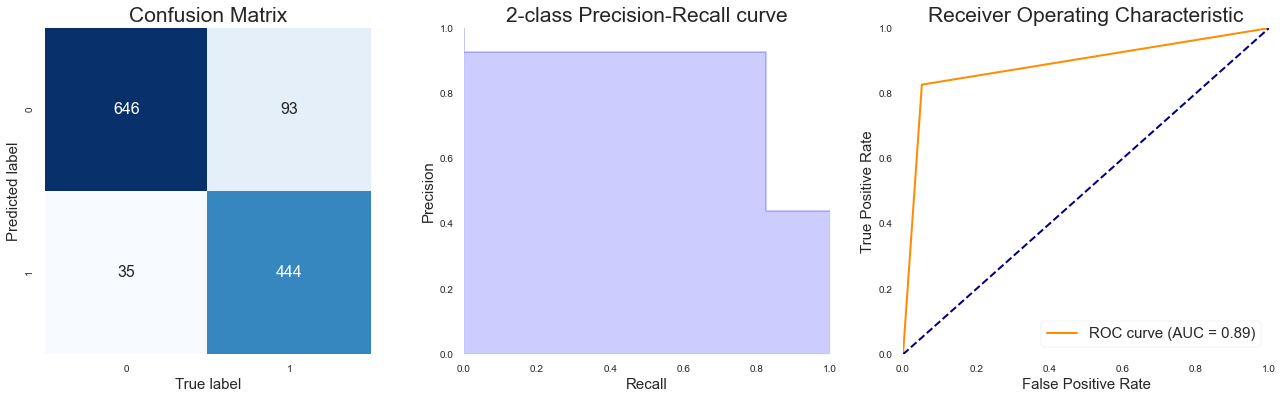

(0.8949096880131363,
 0.9269311064718163,
 0.8268156424581006,
 0.8877103175579785)

In [66]:
show_summary_report(y_valid[:,1], y_round_pred_drop)

# 7. Summary Table

In [67]:
results = {
    'Baseline Model' : [accuracy_score(y_valid[:,1], y_round_pred_base), precision_score(y_valid[:,1], y_round_pred_base), recall_score(y_valid[:,1], y_round_pred_base), roc_auc_score(y_valid[:,1], y_round_pred_base)],
    'Reduced Model' : [accuracy_score(y_valid[:,1], y_round_pred_reduced), precision_score(y_valid[:,1], y_round_pred_reduced), recall_score(y_valid[:,1], y_round_pred_reduced), roc_auc_score(y_valid[:,1], y_round_pred_reduced)],
    'Regularised Model' : [accuracy_score(y_valid[:,1], y_round_pred_reg), precision_score(y_valid[:,1], y_round_pred_reg), recall_score(y_valid[:,1], y_round_pred_reg), roc_auc_score(y_valid[:,1], y_round_pred_reg)],
    'Dropout Model' : [accuracy_score(y_valid[:,1], y_round_pred_drop), precision_score(y_valid[:,1], y_round_pred_drop), recall_score(y_valid[:,1], y_round_pred_drop), roc_auc_score(y_valid[:,1], y_round_pred_drop)]
}

scores = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'ROC_AUC'] , columns=['Baseline Model', 'Reduced Model', 'Regularised Model', 'Dropout Model'])
scores

,Baseline Model,Reduced Model,Regularised Model,Dropout Model
Accuracy,0.894089,0.894089,0.926929,0.894910
Precision,0.914634,0.923237,0.946215,0.926931
Recall,0.837989,0.828678,0.884544,0.826816
ROC_AUC,0.888157,0.887173,0.922448,0.887710


# 8. Do Predictions

In [68]:
test_input = test['text']

In [69]:
tk1 = Tokenizer(num_words=NB_WORDS,
                lower=True,
               split=" ")

tk1.fit_on_texts(test_input)

In [70]:
print('Fitted tokenizer on {} documents'.format(tk1.document_count))
print('{} words in dictionary'.format(tk1.num_words))

Fitted tokenizer on 3263 documents
10000 words in dictionary


In [71]:
test_input_seq = tk1.texts_to_sequences(test_input)

print('"{}" is converted into {}'.format(test_input[1], test_input_seq[1]))
print('{} words in dictionary'.format(tk1.num_words))

"Heard about #earthquake is different cities, stay safe everyone." is converted into [272, 53, 247, 11, 1907, 1103, 743, 890, 429]
10000 words in dictionary


In [72]:
def one_hot_seq1(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

In [73]:
test_input_oh = one_hot_seq1(test_input_seq)


print('"{}" is converted into {}'.format(test_input_seq[1], test_input_oh[1]))
print('For this example we have {} features with a value of 1.'.format(test_input_oh[1].sum()))

"[272, 53, 247, 11, 1907, 1103, 743, 890, 429]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 9.0 features with a value of 1.


In [74]:
test_pred = reg_model.predict(test_input_oh)

test_pred_round = np.argmax(test_pred, axis=1)

test['target'] = test_pred_round

In [75]:
test[['text', 'target']].sample(20)

,text,target
844,@CurfewBeagle @beaglefreedom Pretty Curfew!!!??,1
2904,GSP issues STRONG THUNDERSTORM WILL IMPACT PORTIONS OF NORTHEASTERN PICKENS COUNTY UNTIL 1115 PM EDT for Greater Pickens Pickens MountainÛ_,1
1978,Artifacts found in southern Indiana landslide near Horseshoe Casino http://t.co/BdB0NpgPkH http://t.co/jbCC0KShol,1
965,Businesses are deluged with invoices. Make yours stand out with colour or shape and it's likkly to rise to the top os the pay' pile.,1
2324,Police: Tennessee theater shooting suspect was 29 http://t.co/CthoDZpLW3 #Philadelphia #News,1
2532,I'm having a meltdown because of Game of Thrones ?? literally cried screamed and threw my computer #WHYYYY #redwedding,1
2042,RedScareBot: Duck and Cover! RT tanstaafl23: noah_anyname Socialism means mass murder. Houze that for 'correlation'?,0
1499,I liked a @YouTube video from @shawlarmedeai http://t.co/NN4fY1WBxf Easy Natural Bride makeup tutorial Makeup explosion Ft ABH Shadow,1
2234,'I must not fear. Fear is the mind-killer. Fear is the little-death that brings total obliteration... http://t.co/oERI3uWnRY,1
2472,I have stopped trying to figure out if THIS will be the misogyny/racism/religion-fueled shooting that will incite rioting.,1
